<a href="https://colab.research.google.com/github/shafalivia/shafalivia/blob/main/A2_2109116026_Posttest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Posttest Praktikum Data Mining</h1>

NIM **2109116026**

NAMA **Shafa Nur Alifia**

> Kerjakanlah tugas berikut berdasarkan instruksi yang diberkan. Kumpulkanlah hasil posttest ini pada Github dengan mengumpulkan link repository kalian.

Ketentuan pengumpulan tugas :
1. Kumpul Tugas ini dengan Format Kelas_NIM_Posttest 1.ipynb
2. Kumpulkan dalam bentuk link repository github
3. Berikan penjelasan untuk setiap blok kode dengan membuat text atau comment pada kodingan
4. Untuk bagian penjelasan gausa terlalu panjang. 
singkat padat dan jelas




In [ ]:
#Import Library
import pandas as pd
import seaborn as sns
import plotly.express as px
#Membaca data frame ChurnBank.csv
df = pd.read_csv("ChurnBank.csv")
df #Menampilkan dataset

## Business Understanding



1.   **Tujuan penggunaan dataset**<br>
     Dataset ini berisikan data terkait client yang aktif (Existing) dan hilang/tidak aktif lagi (Attrited) karena alasan apapun. Dengan adanya data ini, yang berisikan beberapa atribut identitas client, maka kedepannya dapat diprediksi client dengan identitas bagaimana yang memiliki peluang terbesar menjadi client Attrited, sehingga dapat dilakukan pencegahan.

2.   **Tujuan Perusahaan**<br>
     Perusahaan ini bergerak di bidang Asuransi Kesehatan yang memiliki tujuan untuk memberikan pelayanan tabungan khusus biaya kesehatan, yang nantinya akan menanggung biaya kesehatan client sebesar apapun dengan syarat dan ketentuan.

3.   **Tujuan penggunaan Naive Bayes**<br>
     Naive bayes pada dataset ini digunakan untuk menghitung kemungkinan/probabilitas dalam klasifikasi data yang menghasilkan nilai prediksi tunggal/berdasarkan satu parameter saja. Dalam kasus dataset ini, Naive Bayes digunakan untuk memprediksi kemungkinan client menjadi aktif kedepannya atau tidak dan menghitung nilai probabilitasnya.

## Data Understanding

In [ ]:
filter = df.Attrition_Flag == "Attrited Customer" #Variabel yang hanya mengambil dataset dengan label Attrited Customer
df1 = df[filter] #data khusus yang Attrited Customer
df2 = df[~filter] #data selain Attrited Customer
df3 = df[df.Customer_Age < 50] #customer usia dibawah 50 tahun
df4 = df[df.Marital_Status == "Single"] #customer yang statusnya Single

In [40]:
dfi = (df.info())
dfi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20 non-null     int64  
 1   CLIENTNUM        20 non-null     int64  
 2   Attrition_Flag   20 non-null     object 
 3   Customer_Age     20 non-null     int64  
 4   Gender           20 non-null     object 
 5   Education_Level  20 non-null     object 
 6   Marital_Status   20 non-null     object 
 7   Income_Category  20 non-null     object 
 8   Card_Category    20 non-null     object 
 9   Credit_Limit     20 non-null     float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


<p>Dari data info yang ada dapat diketahui bahwa dataset ini memiliki 20 data, dengan 10 kolom, yang masing-masing tidak kosong/not-null. Terdapat 3 jenis tipe data yang digunakan, yaitu Object, Integer dengan lebar 64, dan Float dengan lebar 64. Pada data info diatas penomoran menggunakan index (dari 0). Dataset ini menggunakan penyimpanan memori sekitar 1.7 KiloBytes. Dataset ini masuk kelas Data Frame dari library pandas.</p>

In [12]:
#nilai rata-rata, min,max, dan standar deviasi untuk kolom bertipe angka
#menggunakan fungsi agregat supaya bisa langsung sekalian semuanya
dfm = df.aggregate({"Unnamed: 0":["min", "max", "mean", "std"],
                    "CLIENTNUM":["min", "max", "mean", "std"],
                     "Customer_Age":["min", "max", "mean", "std"],
                     "Credit_Limit":["min", "max", "mean", "std"]})
dfm

,Unnamed: 0,CLIENTNUM,Customer_Age,Credit_Limit
min,176.000000,7.092220e+08,32.000000,1438.300000
max,10084.000000,8.098441e+08,59.000000,26792.000000
mean,6105.100000,7.424893e+08,47.250000,8114.580000
std,2850.304026,4.045524e+07,7.859791,8331.036819


## Explore Data (Visualisasi)

### Comparasion (Perbandingan)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

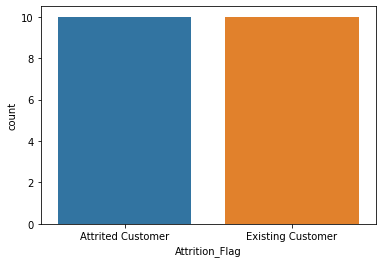

In [49]:
#menampilkan berapa banyak yang attired customer dan tidak
sns.countplot(data=df, x="Attrition_Flag")

<p>Visualisasi Countplot diatas menunjukkan perbandingan banyaknya Attrited Customer dengan Existing Customer. Dari perbandingan tersebut tampak bahwa jumlahnya sama banyak.</p>

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

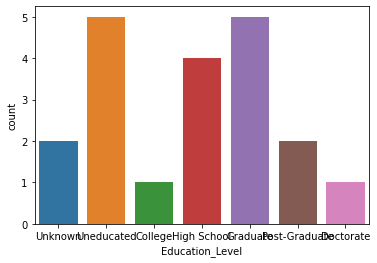

In [50]:
#menampilkan berapa banyak Education level berdasarkan kategori-kategorinya 
sns.countplot(data=df, x="Education_Level")

<p>Visualisasi Countplot diatas menunjukkan perbandingan jumlah dari tiap kategori tingkat pendidikan. Dari perbandingan tersebut tampak bahwa tingkat pendidikan paling banyak adalah Uneducated (Orange), Graduated (Purple), dan High School (Red). Lalu yang paling sedikit adalah College dan Doctorate.</p>

<AxesSubplot:xlabel='Gender', ylabel='count'>

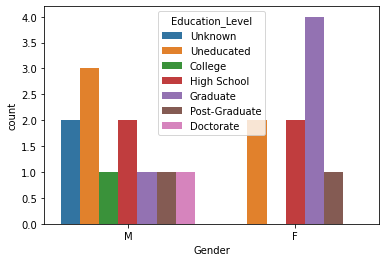

In [51]:
#menampilkan berapa banyak Education level berdasarkan gendernya
#sns.countplot(data=df, x="Education_Level", hue="Gender")
sns.countplot(data=df, hue="Education_Level", x="Gender") #pake ini lebih enak dibaca

<p>Visualisasi Countplot diatas menunjukkan perbandingan tingkat pendidikan antara gender Male(M) dan Female(F). Dari perbandingan tersebut tampak bahwa tingkat pendidikan Male(M) yang paling banyak adalah Uneducated, dan Female(F) paling banyak Graduate. Dapat dilihat juga bahwa tidak ada Female(F) yang memiliki tingkat pendidikan Unknown, College, dan Doctorate.</p>

### Distribution (Distribusi)

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

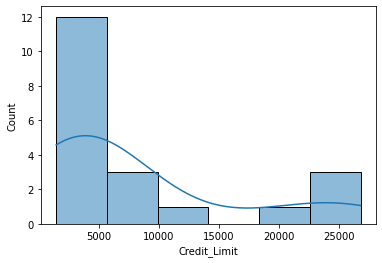

In [13]:
#historgram dan boxplot credit card limit
sns.histplot(data=df, x="Credit_Limit", kde=True)

<p>Visualisasi Histogram diatas menunjukkan distribusi dari limit kartu kredit client. Dari garis/kurva distribusi tersebut tampak bahwa limit kredit yang paling banyak dimiliki client adalah kurang lebih 5000. Dapat dilihat juga semakin besar limit kredit, semakin landai garisnya, berarti semakin sedikit client yang berada pada limit tersebut.</p>

<AxesSubplot:xlabel='Credit_Limit'>

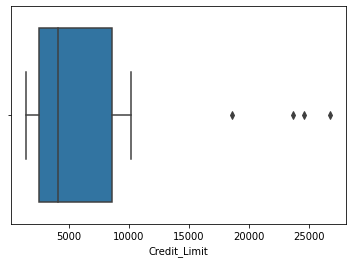

In [47]:
sns.boxplot(data=df, x="Credit_Limit")

<p>Visualisasi Boxplot diatas menunjukkan distribusi dari limit kartu kredit client. Dari distribusi/persebaran tersebut tampak bahwa limit kredit yang paling banyak dimiliki client berada pada range 5000 dan tidak lebih dari 10000. Dapat dilihat juga semakin besar limit kredit, semakin sedikit titik/persebarannya, berarti semakin sedikit client yang berada pada limit tersebut.</p>

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

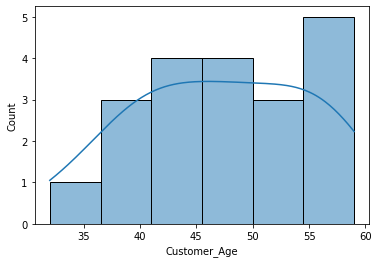

In [14]:
#histogram dan boxplot umur
sns.histplot(data=df, x="Customer_Age", kde=True)

<p>Visualisasi Histogram diatas menunjukkan distribusi dari umur client. Dari garis/kurva distribusi tersebut tampak bahwa umur client paling banyak berada di range 55 keatas, tetapi tidak sampai 60 tahun. Dapat dilihat juga client yang mendaftar asuransi biasanya berada di umur 40 keatas.</p>

<AxesSubplot:xlabel='Customer_Age'>

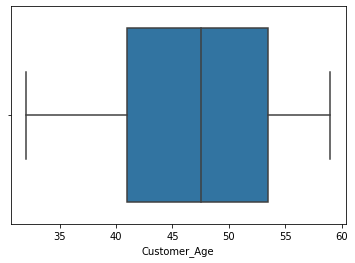

In [48]:
sns.boxplot(data=df, x="Customer_Age")

<p>Visualisasi Boxplot diatas menunjukkan distribusi dari umur client. Dari distribusi tersebut tampak bahwa umur client rata-rata berada di range 45-50 tahun. Dapat dilihat juga client yang mendaftar asuransi biasanya berada di umur 40 keatas hingga 50an.</p>

### Relation (Relasi)

<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

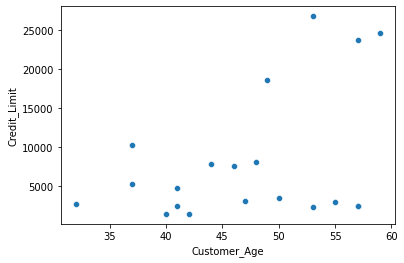

In [52]:
#scatterplot untuk umur customer dan credit card limit
sns.scatterplot(data=df, x="Customer_Age", y="Credit_Limit")

<p>Visualisasi Scatterplot diatas tidak menunjukkan relasi secara eksplisit antara umur client dan limit kartu kreditnya. Namun, jika dilihat lebih detail, maka dapat diketahui bahwa kebanyakan client umur 40-50an tahun memiliki limit kredit dibawah 10000.</p>

### Composition (Komposisi)

In [15]:
#pieplot untuk Income Category
px.pie(df, names="Income_Category")

<p>Visualisasi Piechart diatas menunjukkan komposisi dari kategori income/pemasukan client. Dapat dilihat bahwa sebagian besar client memiliki pendapatan kurang dari 40K dan sebanyak 60K dengan presentase yang sama. Lalu, kategori pendapatan terbesar setelahnya adalah 80K dan Unknown. Sisanya memiliki pendapatan 40K dan lebih dari 120K dengan presentase yang sama.</p>

In [16]:
#pieplot untuk Education Level
px.pie(df, names="Education_Level")

<p>Visualisasi Piechart diatas menunjukkan komposisi dari tingkat pendidikan client. Dapat diketahui bahwa 2 tingkat paling banyak adalah Graduate dan Uneducated. Presentase terbesar selanjutnya adalah High School. Dengan presentase yang seimbang, selanjutnya terdapat Post-Graduate dan Unknown. Dan yang paling sedikit adalah College dan Doctorate.</p>

### Boxplot

<AxesSubplot:xlabel='Credit_Limit', ylabel='Gender'>

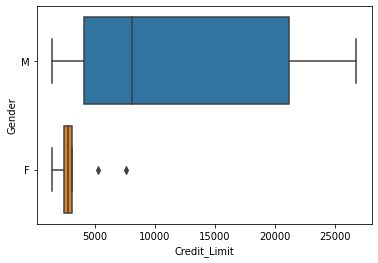

In [56]:
#Credit Card Limit dengan Jenis Kelamin sebagai pemisahnya (color)
sns.boxplot(data=df, x="Credit_Limit", y="Gender")

<p>Visualisasi Boxplot diatas menunjukkan persebaran/distribusi limit kartu kredit berdasarkan Gender. Dapat diketahui bahwa Gender Female(F) rata-rata memiliki limit dibawah 5000, dan Male(M) rata-rata berada pada limit diatas 5000. Persebaran limit Male(M) jauh lebih luas dibandingkan Female(F) yang rentang atas nya hanya dibawah 5000.</p>

<AxesSubplot:xlabel='Credit_Limit', ylabel='Attrition_Flag'>

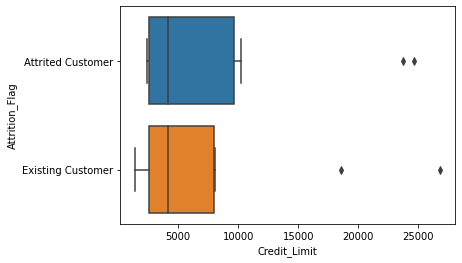

In [57]:
#Credit Card Limit dengan Attrition Flag sebagai pemisahnya (color)
sns.boxplot(data=df, x="Credit_Limit", y="Attrition_Flag")

<p>Visualisasi Boxplot diatas menunjukkan persebaran/distribusi limit kartu kredit berdasarkan jenis client (Attrited/Existing). Dapat diketahui bahwa rata-rata limit berada pada titik yang hampir sama, namun rentang persebaran Attrited Cust lebih luas.</p>

<AxesSubplot:xlabel='Customer_Age', ylabel='Attrition_Flag'>

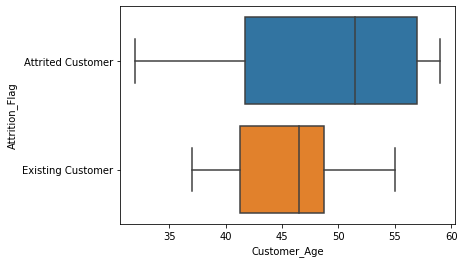

In [58]:
#Age dengan Attrition Flag sebagai pemisahnya (color)
sns.boxplot(data=df, x="Customer_Age", y="Attrition_Flag")

<p>Visualisasi Boxplot diatas menunjukkan persebaran/distribusi jenis client (Attrited/Existing) berdasarkan umur. Dapat diketahui bahwa rentang Attrited Cust lebih luas dengan rentang atas hampir 60 tahun, sedangkan Existing Cust hanya sampai 55 tahun. Namun, umur muda paling banyak di kedua jenis client berada pada titik yang hampir sama, yaitu 40an tahun.</p>

### Countplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

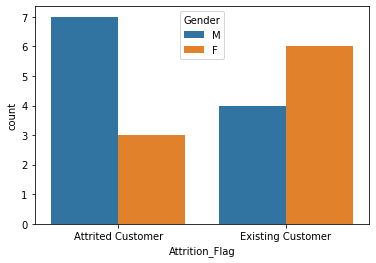

In [60]:
#Attrition Flag dengan jenis kelamin sebagai pemisahnya (color)
sns.countplot(data=df, x="Attrition_Flag", hue="Gender")

<p>Visualisasi Countplot diatas menunjukkan perbandingan Gender diantara 2 jenis client (Attrited/Existing). Dapat diketahui bahwa Attrited Cust paling besar memiliki Gender Male(M), sedangkan Existing Cust paling banyak Female(F).</p>

### Heatmap

,Unnamed: 0,CLIENTNUM,Customer_Age,Credit_Limit
0,6036,720010608,37,10226.0
1,6684,711323283,57,2527.0
2,4272,794707083,50,3495.0
3,9759,709657533,44,7793.0
4,4740,716625033,32,2761.0
5,9597,715076358,57,23714.0
6,5009,804829533,59,24621.0
7,8200,712144158,53,2370.0
8,5016,795599883,57,2404.0
9,8350,709222008,41,4742.0


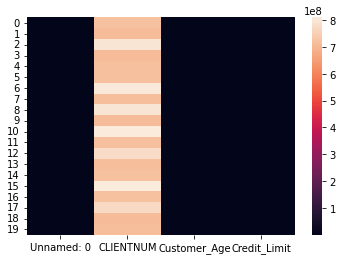

In [11]:
#Setiap variabel numerik yang ada
dfnum = df[['Unnamed: 0', 'CLIENTNUM', 'Customer_Age', 'Credit_Limit']] #mengambil kolom angka saja
dfnum
sns.heatmap(data=dfnum) #membuat heatmap nya
#Gimana bikin heatmap kalo rentang angkanya jauhan bang?
#Intinya, heatmap/titik panas menunjukkan persebaran dari sebuah data matrix dari satu set data.
#Semakin muda warnanya, semakin rendah nilainya.
#Sebaliknya, semakin tua warnanya, semakin tinggi nilainya.

## Algoritma Naive Bayes

<p>1. Membuat dataset baru</p>

In [ ]:
dfn = df.drop(['Unnamed: 0', 'CLIENTNUM', 'Customer_Age', 'Credit_Limit'], axis=1)
dfn

<p>2. Membuat fungsi Naive Bayes</p>

In [18]:
def naivebayes(kemungkinan:list):
  ac = dfn[dfn.Attrition_Flag == 'Attrited Customer'] #dataset khusus Attrited Customer
  kasus_ac = len(ac)/len(dfn) #peluang kasus Attrited Customer

  ex = dfn[dfn.Attrition_Flag == 'Existing Customer'] #dataset khusus Existing Customer
  kasus_ex = len(ex)/len(dfn) #peluang kasus Existing Customer

  #Hitung nilai P(XK|Ci) untuk setiap kelas i
  for i in range(len(kemungkinan)):
    p_ac = ac[ac.iloc[:,i] == kemungkinan[i]]
    #Variabel kemungkinan Attrited Customer dengan mengambil index location/iloc dari index kolom dataset AC
    p_ex = ex[ex.iloc[:,i] == kemungkinan[i]]
    #Variabel kemungkinan Attrited Customer dengan mengambil index location/iloc dari index kolom dataset EX

    #Jumlah total setiap kasus (termasuk setiap data unik pada keseluruhan dataset/dfn)
    a = len(ac) + len(dfn.iloc[:,i].unique())
    b = len(ex) + len(dfn.iloc[:,i].unique())

    peluang_baru_ac = (len(p_ac) +1) / a
    peluang_baru_ex = (len(p_ex) +1) / b

  #Hitung nilai P(X|Ci) untuk setiap Kelas (Label)
    if i > 0: #jika nilainya tidak nol, maka dapat dikalikan.
      p_terjadi_ac *= peluang_baru_ac
      p_terjadi_ex *= peluang_baru_ex
    else: #jika tidak, maka tetap nol.
      p_terjadi_ac = peluang_baru_ac
      p_terjadi_ex = peluang_baru_ex

  #Hitung nilai P(X|Ci) * P(Ci)
  peluang_baru_ac = kasus_ac * p_terjadi_ac
  peluang_baru_ex = kasus_ex * p_terjadi_ex

  #Menetukan klas dari kasus
  total_p = peluang_baru_ac + peluang_baru_ex
  perbandingan = peluang_baru_ex / total_p
  
  output = 'Attrited Customer' if perbandingan < 0.5 else 'Existing Customer'
  turn = str(perbandingan)
  print('Hasil perhitungan akhir adalah ' + output + ' dengan nilai peluang ' + turn)

<p>3. Contoh input data</p>

In [19]:
naivebayes(["F", "Uneducated", "Single", "Unknown", "Blue"])
naivebayes(["M", "Graduate", "Single", "Less than $40K", "Blue"])

Hasil perhitungan akhir adalah Attrited Customer dengan nilai peluang 0.25
Hasil perhitungan akhir adalah Existing Customer dengan nilai peluang 0.5
